In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'fake-and-real-news-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4831777%2F8165591%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240511%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240511T190906Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D38bb065795c6e573cb0b8ffa4ef23785955d5c714864ded5480e4287768eef12ae8deb294277b34bfa5a8d0631b87b06133fa3864b57497a7a79193f1660f4bb1b998d66e3fce3e9e6b8261bc28bf94f73d0c4e232deec8b8d2e1de7e7a9c4fb8a9c29fbb6e2ecb7ee50d7785ddf188f0d0f8dc23c05d6684bc3b1e982c0097e3f5a2fd4d6187aa604d66895145a9bc861efdb8584279ba72a4b968b0b7d15285f02fd3f395a6479943ddc142192db1f97314a01c25003688ea82c52a25f471fc904dbdd05353699729536c1c67e152148c6184dfc3dd07acd55b34ec1eeb075e7ac3a2eb2ad974dd3bf6b99ed9da6cb907b92e62ae44231c83397f34150e4a3'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 42975911 bytes downloaded
Downloaded and uncompressed: fake-and-real-news-dataset
Data source import complete.


In [2]:
import pandas as pd

# Lod the  Data

In [3]:
Fake=pd.read_csv("/content/Fake.csv.zip")
true=pd.read_csv("/content/True.zip")

- Give the fake news label 0 :

In [4]:
Fake['label']=0

In [5]:
Fake

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


- Give the true news label 1 :

In [6]:
true['label']=1

In [7]:
true

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


- Delete unneeded columns

In [8]:
Fake.drop(columns=["title","date","subject"],inplace=True)
true.drop(columns=["title","date","subject"],inplace=True)

In [9]:
Fake.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [10]:
true.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


- Add the two data frame in one datarame

In [11]:
News=pd.concat([Fake,true],ignore_index=True)
News

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
44893,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
44894,"LONDON (Reuters) - LexisNexis, a provider of l...",1
44895,MINSK (Reuters) - In the shadow of disused Sov...,1
44896,MOSCOW (Reuters) - Vatican Secretary of State ...,1


- Check for cleaning data

In [12]:
News.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   label   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB


In [13]:
News.isnull().sum()

text     0
label    0
dtype: int64

In [14]:
News.duplicated().sum()

6251

In [15]:
News.drop_duplicates(inplace=True)
News.duplicated().sum()

0

# preprocessing the text n the data:

In [16]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np
nltk.download('wordnet', "/kaggle/working/nltk_data/")
nltk.download('omw-1.4', "/kaggle/working/nltk_data/")
! unzip /kaggle/working/nltk_data/corpora/wordnet.zip -d /kaggle/working/nltk_data/corpora
! unzip /kaggle/working/nltk_data/corpora/omw-1.4.zip -d /kaggle/working/nltk_data/corpora
nltk.data.path.append("/kaggle/working/nltk_data/")

[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /kaggle/working/nltk_data/...


Archive:  /kaggle/working/nltk_data/corpora/wordnet.zip
   creating: /kaggle/working/nltk_data/corpora/wordnet/
  inflating: /kaggle/working/nltk_data/corpora/wordnet/lexnames  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/data.verb  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.adv  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.verb  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/data.adj  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.adj  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/LICENSE  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/citation.bib  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/noun.exc  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/verb.exc  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/README  
  inflating: /kaggle/w

- this function for cleaning the text in the dataframe from any strange character and abstract all words to the original and return the unique words in each sentence:

In [17]:

def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I) # Remove extra white space from text

    text = re.sub(r'\W', ' ', str(text)) # Remove all the special characters from text

    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) # Remove all single characters from text

    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove any character that isn't alphabetical

    text = text.lower()

    words = word_tokenize(text)

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    stop_words = set(stopwords.words("english"))
    Words = [word for word in words if word not in stop_words]

    Words = [word for word in Words if len(word) > 3]

    indices = np.unique(Words, return_index=True)[1]
    cleaned_text = np.array(Words)[np.sort(indices)].tolist()

    return cleaned_text

In [18]:
x=News.drop('label',axis=1)
y=News.label

- make the column of the text in dataframe to list:

In [19]:
texts=list(x['text'])

- call the function to cleaning the texts in this list:

In [21]:
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')
cleaned_text = [process_text(text) for text in texts]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
print(cleaned_text[:10])

[['donald', 'trump', 'wish', 'american', 'happy', 'year', 'leave', 'instead', 'give', 'shout', 'enemy', 'hater', 'dishonest', 'fake', 'news', 'medium', 'former', 'reality', 'show', 'star', 'country', 'rapidly', 'grows', 'stronger', 'smarter', 'want', 'friend', 'supporter', 'even', 'healthy', 'president', 'angry', 'pant', 'tweeted', 'great', 'america', 'realdonaldtrump', 'december', 'tweet', 'went', 'welll', 'expect', 'kind', 'sends', 'greeting', 'like', 'despicable', 'petty', 'infantile', 'gibberish', 'lack', 'decency', 'allow', 'rise', 'gutter', 'long', 'enough', 'citizen', 'bishop', 'talbert', 'swan', 'talbertswan', 'calvin', 'calvinstowell', 'impeachment', 'would', 'make', 'also', 'accept', 'regaining', 'control', 'congress', 'miranda', 'yaver', 'mirandayaver', 'hear', 'talk', 'include', 'many', 'people', 'hate', 'wonder', 'alan', 'sandoval', 'alansandoval', 'word', 'marlene', 'koren', 'pollitt', 'korencarpenter', 'including', 'fought', 'lost', 'badly', 'know', 'love', 'nothing', 'd

# split the texts and the labels of the fake and real news:

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleaned_text, y, test_size=0.2, random_state=42)

- tokenize the all words in the data and transform them to be sequences:

In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
word_idx = tokenizer.word_index  # Corrected syntax for accessing word index
v = len(word_idx)
print("the size of vocab =", v)  # Corrected spacing
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


the size of vocab = 91495


- make each sentence has lengthe 150 if te sentence s less than this length we fill it with zeros , if iit is bigger we remove the rest of the sentnces:

In [25]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 150
X_train = pad_sequences(X_train,maxlen=maxlen)
X_test = pad_sequences(X_test,maxlen=maxlen)



In [26]:
y.value_counts()

label
1    21192
0    17455
Name: count, dtype: int64

- build the model

In [27]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense,Input,GlobalMaxPooling1D,Dropout
from tensorflow.keras.models import Model
from keras import optimizers
import numpy as np
from tensorflow.keras.optimizers import Adam



In [28]:
inputt=Input(shape=(maxlen,))
learning_rate = 0.0001
x=Embedding(v+1,100)(inputt)
x = Dropout(0.5)(x)
x = LSTM(150,return_sequences=True)(x)
x = Dropout(0.5)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax')(x)

model = Model(inputt, x)

# Define optimizer with specified learning rate
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


-make label encoder to the labels to pass it to the model:

In [29]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


transform it to be categorical

In [30]:
import tensorflow as tf

y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded)

# train the model:

In [32]:

history = model.fit(X_train, y_train_one_hot, epochs=3, validation_data=(X_test, y_test_one_hot))


Epoch 1/3
967/967 [==============================] - 494s 511ms/step - loss: 0.3664 - accuracy: 0.8170 - val_loss: 0.1746 - val_accuracy: 0.9643
Epoch 2/3
967/967 [==============================] - 519s 536ms/step - loss: 0.0840 - accuracy: 0.9733 - val_loss: 0.1000 - val_accuracy: 0.9757
Epoch 3/3
967/967 [==============================] - 501s 518ms/step - loss: 0.0424 - accuracy: 0.9878 - val_loss: 0.0875 - val_accuracy: 0.9772


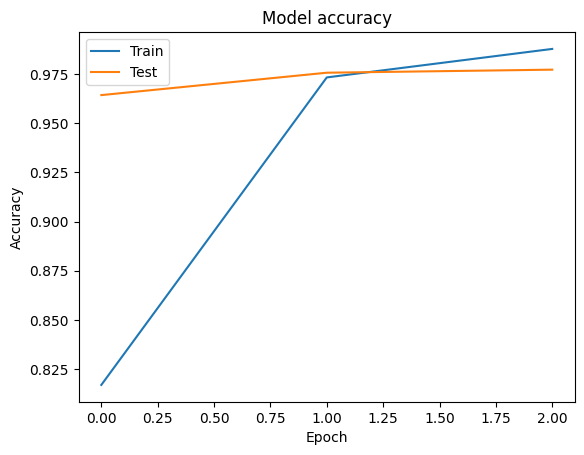

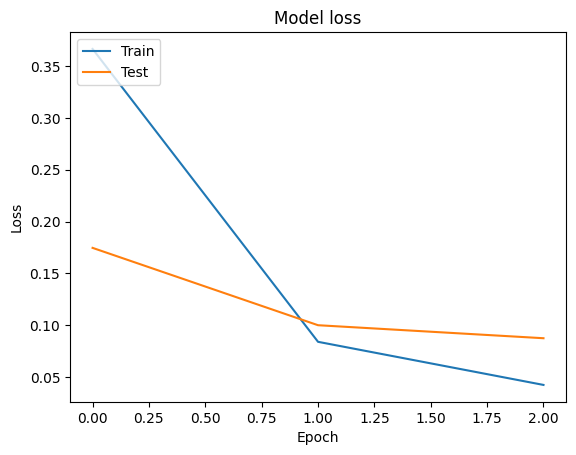

In [33]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Accuracy:

In [34]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test_one_hot)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


242/242 [==============================] - 21s 89ms/step - loss: 0.0875 - accuracy: 0.9772
Test Loss: 0.08746686577796936
Test Accuracy: 0.9772315621376038


242/242 [==============================] - 21s 84ms/step


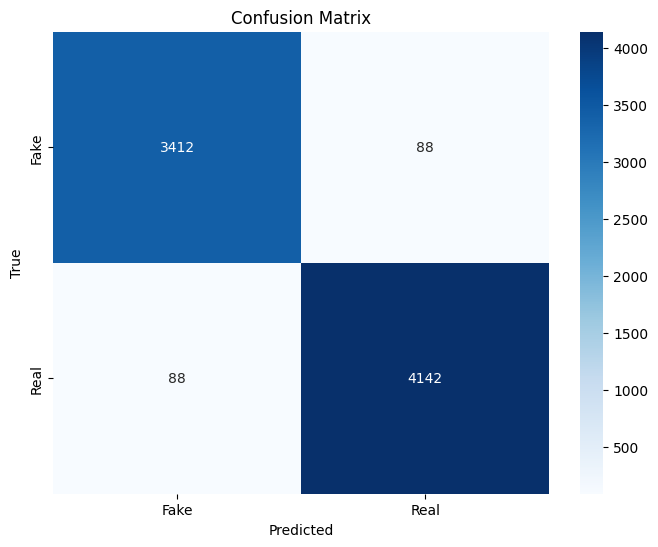

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test_one_hot, axis=1)
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Real'],
            yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [36]:

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test_one_hot)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

242/242 [==============================] - 22s 90ms/step - loss: 0.0875 - accuracy: 0.9772
Test Loss: 0.08746686577796936
Test Accuracy: 0.9772315621376038


In [37]:
from tensorflow.keras.layers import Input, Embedding, GRU, Dropout, GlobalMaxPooling1D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

inputt = Input(shape=(maxlen,))
learning_rate = 0.0001

x = Embedding(v+1, 100)(inputt)
x = Dropout(0.5)(x)
x = GRU(150, return_sequences=True)(x)
x = Dropout(0.5)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax')(x)

model = Model(inputt, x)

# Define optimizer with specified learning rate
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [39]:
history = model.fit(X_train, y_train_one_hot, epochs=3, validation_data=(X_test, y_test_one_hot))

Epoch 1/3
967/967 [==============================] - 470s 484ms/step - loss: 0.4198 - accuracy: 0.7721 - val_loss: 0.1848 - val_accuracy: 0.9607
Epoch 2/3
967/967 [==============================] - 465s 481ms/step - loss: 0.0845 - accuracy: 0.9740 - val_loss: 0.1125 - val_accuracy: 0.9752
Epoch 3/3
967/967 [==============================] - 463s 479ms/step - loss: 0.0445 - accuracy: 0.9876 - val_loss: 0.0788 - val_accuracy: 0.9779


In [40]:
from tensorflow.keras.layers import Input, Embedding, Flatten, Dropout, GlobalMaxPooling1D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

inputt = Input(shape=(maxlen,))
learning_rate = 0.0001

x = Embedding(v+1, 100)(inputt)
x = Dropout(0.5)(x)
x = Flatten()(x)  # Flatten layer instead of LSTM
x = Dense(150, activation='relu')(x)  # Adding Dense layer after Flatten
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax')(x)

model = Model(inputt, x)

# Define optimizer with specified learning rate
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [42]:
import tensorflow as tf

y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded)

In [43]:
history = model.fit(X_train, y_train_one_hot, epochs=3, validation_data=(X_test, y_test_one_hot))

Epoch 1/3
967/967 [==============================] - 256s 263ms/step - loss: 0.4857 - accuracy: 0.7617 - val_loss: 0.1540 - val_accuracy: 0.9435
Epoch 2/3
967/967 [==============================] - 250s 259ms/step - loss: 0.1123 - accuracy: 0.9617 - val_loss: 0.0765 - val_accuracy: 0.9717
Epoch 3/3
967/967 [==============================] - 265s 274ms/step - loss: 0.0419 - accuracy: 0.9870 - val_loss: 0.0662 - val_accuracy: 0.9753


242/242 [==============================] - 2s 6ms/step


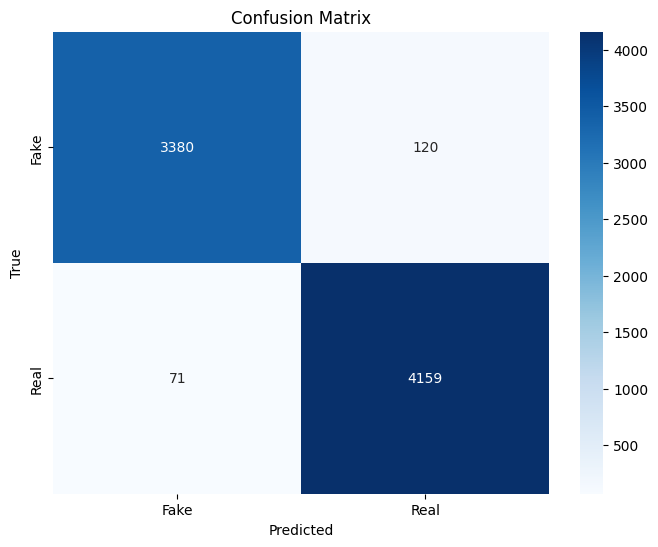

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test_one_hot, axis=1)
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Real'],
            yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [45]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test_one_hot)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

242/242 [==============================] - 2s 6ms/step - loss: 0.0662 - accuracy: 0.9753
Test Loss: 0.0661662295460701
Test Accuracy: 0.9752910733222961


In [46]:
from tensorflow.keras.layers import Input, Embedding, Conv1D, Dropout, GlobalMaxPooling1D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

inputt = Input(shape=(maxlen,))
learning_rate = 0.0001

x = Embedding(v+1, 100)(inputt)
x = Dropout(0.5)(x)
x = Conv1D(150, 5, activation='relu')(x)  # Using Conv1D with a filter size of 5
x = Dropout(0.5)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax')(x)

model = Model(inputt, x)

# Define optimizer with specified learning rate
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [47]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [48]:
import tensorflow as tf

y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded)

In [49]:
history = model.fit(X_train, y_train_one_hot, epochs=3, validation_data=(X_test, y_test_one_hot))

Epoch 1/3
967/967 [==============================] - 280s 288ms/step - loss: 0.5679 - accuracy: 0.6808 - val_loss: 0.3112 - val_accuracy: 0.9229
Epoch 2/3
967/967 [==============================] - 287s 297ms/step - loss: 0.1588 - accuracy: 0.9445 - val_loss: 0.1681 - val_accuracy: 0.9559
Epoch 3/3
967/967 [==============================] - 278s 288ms/step - loss: 0.0991 - accuracy: 0.9657 - val_loss: 0.1303 - val_accuracy: 0.9636


242/242 [==============================] - 6s 23ms/step


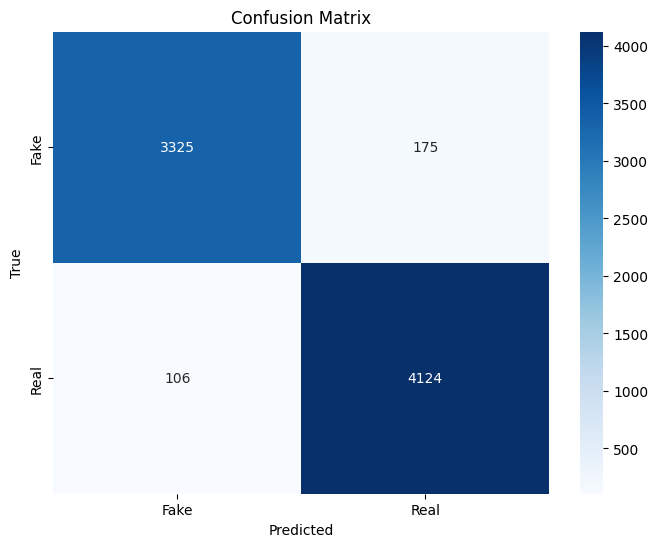

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test_one_hot, axis=1)
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Real'],
            yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()